## Monte Carlo Simulation for Optimization Search




In [51]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
start_date='26-07-2014'
end_date='24-07-2020'
stocks = ['^AXFJ','^AXUJ','^AXHJ','^AXNJ','MGR.AX','^AXDJ','^AXSJ','^AXEJ','^AXTJ','^AXMJ','^AXIJ']
def download_data(stocks):
    data = web.DataReader(stocks,data_source='yahoo',start=start_date,end=end_date)['Adj Close']
    data.columns = stocks
    return data
data = download_data(stocks)

In [53]:
stocks=data

In [54]:
stocks.head(1000)

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
Date,,,,,,,,,,,
2014-07-28,6226.790039,5892.649902,14340.980469,4161.669922,1.369032,1834.949951,9995.290039,14618.900391,1887.560059,10426.650391,823.659973
2014-07-29,6235.359863,5909.649902,14379.089844,4152.129883,1.365218,1839.270020,10080.549805,14593.240234,1896.969971,10451.610352,824.179993
2014-07-30,6275.620117,5987.620117,14472.610352,4193.459961,1.380472,1848.390015,10161.900391,14662.620117,1906.640015,10487.549805,828.650024
2014-07-31,6300.850098,5940.580078,14569.110352,4183.629883,1.384286,1853.150024,10218.660156,14656.750000,1908.229980,10445.480469,837.619995
2014-08-01,6215.020020,5900.160156,14185.969727,4123.720215,1.369032,1830.260010,10078.540039,14469.400391,1890.380005,10318.669922,822.809998
...,...,...,...,...,...,...,...,...,...,...,...
2018-07-02,6197.000000,8189.100098,30366.800781,5900.799805,2.031551,2440.000000,11216.900391,11941.000000,985.500000,12204.500000,1129.300049
2018-07-03,6253.700195,8294.200195,30708.099609,5966.700195,2.059380,2463.500000,11345.700195,12052.200195,1006.599976,12029.900391,1133.400024
2018-07-04,6207.500000,8311.000000,30593.099609,5926.600098,2.068656,2459.800049,11284.900391,12006.900391,1012.000000,12011.500000,1126.900024


In [55]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

^AXFJ    -0.000075
^AXUJ     0.000239
^AXHJ     0.000782
^AXNJ     0.000256
MGR.AX    0.000425
^AXDJ     0.000275
^AXSJ     0.000230
^AXEJ    -0.000275
^AXTJ    -0.000205
^AXMJ     0.000299
^AXIJ     0.000574
dtype: float64

In [56]:
from matplotlib import pyplot

# Simulating Thousands of Possible Allocations

In [57]:
stocks.head()

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
Date,,,,,,,,,,,
2014-07-28,6226.790039,5892.649902,14340.980469,4161.669922,1.369032,1834.949951,9995.290039,14618.900391,1887.560059,10426.650391,823.659973
2014-07-29,6235.359863,5909.649902,14379.089844,4152.129883,1.365218,1839.270020,10080.549805,14593.240234,1896.969971,10451.610352,824.179993
2014-07-30,6275.620117,5987.620117,14472.610352,4193.459961,1.380472,1848.390015,10161.900391,14662.620117,1906.640015,10487.549805,828.650024
2014-07-31,6300.850098,5940.580078,14569.110352,4183.629883,1.384286,1853.150024,10218.660156,14656.750000,1908.229980,10445.480469,837.619995
2014-08-01,6215.020020,5900.160156,14185.969727,4123.720215,1.369032,1830.260010,10078.540039,14469.400391,1890.380005,10318.669922,822.809998


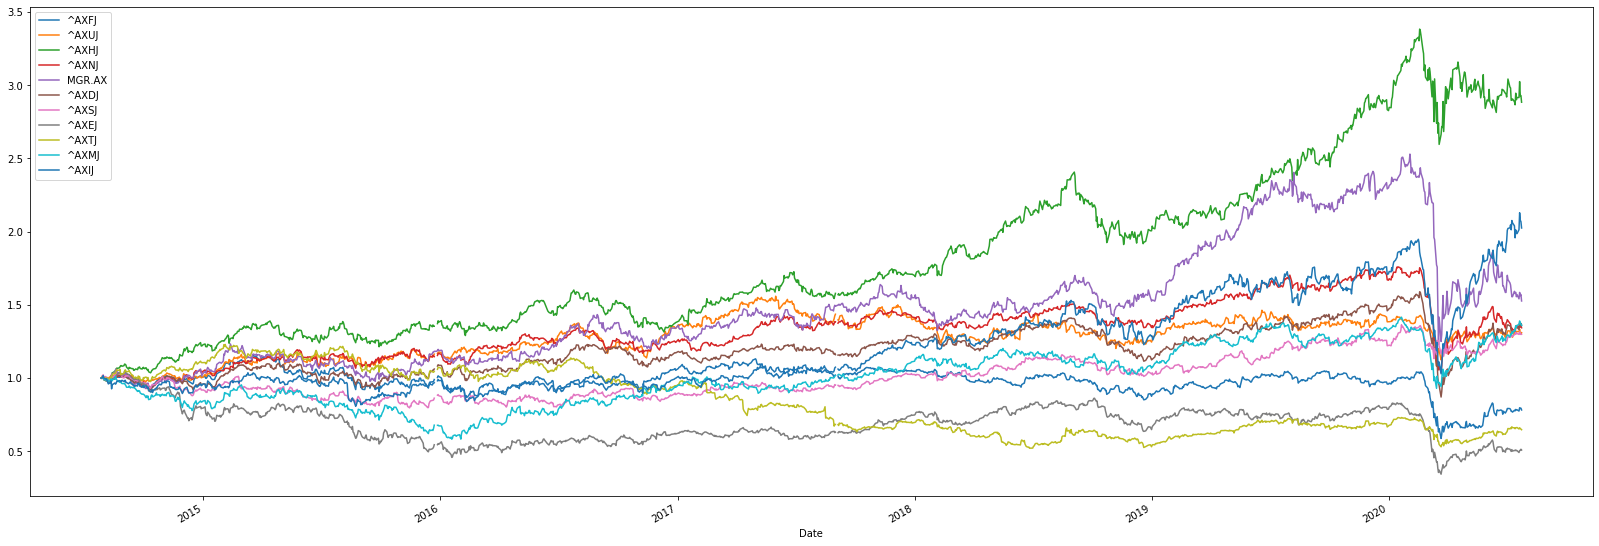

In [58]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(28,10))

In [59]:
stock_normed.corr("pearson").style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
^AXFJ,1.0,0.14,-0.44,0.013,-0.067,0.044,-0.28,0.45,0.31,-0.1,-0.3
^AXUJ,0.14,1.0,0.54,0.79,0.67,0.75,0.41,-0.18,-0.64,0.57,0.51
^AXHJ,-0.44,0.54,1.0,0.8,0.86,0.81,0.91,-0.072,-0.75,0.82,0.93
^AXNJ,0.013,0.79,0.8,1.0,0.94,0.95,0.73,0.068,-0.73,0.82,0.83
MGR.AX,-0.067,0.67,0.86,0.94,1.0,0.9,0.84,0.11,-0.68,0.86,0.88
^AXDJ,0.044,0.75,0.81,0.95,0.9,1.0,0.79,0.16,-0.71,0.84,0.85
^AXSJ,-0.28,0.41,0.91,0.73,0.84,0.79,1.0,0.27,-0.72,0.91,0.93
^AXEJ,0.45,-0.18,-0.072,0.068,0.11,0.16,0.27,1.0,-0.043,0.34,0.15
^AXTJ,0.31,-0.64,-0.75,-0.73,-0.68,-0.71,-0.72,-0.043,1.0,-0.79,-0.74
^AXMJ,-0.1,0.57,0.82,0.82,0.86,0.84,0.91,0.34,-0.79,1.0,0.92


In [60]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
Date,,,,,,,,,,,
2014-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-29,0.001376,0.002885,0.002657,-0.002292,-0.002786,0.002354,0.008530,-0.001755,0.004985,0.002394,0.000631
2014-07-30,0.006457,0.013194,0.006504,0.009954,0.011173,0.004958,0.008070,0.004754,0.005098,0.003439,0.005424
2014-07-31,0.004020,-0.007856,0.006668,-0.002344,0.002763,0.002575,0.005586,-0.000400,0.000834,-0.004011,0.010825
2014-08-01,-0.013622,-0.006804,-0.026298,-0.014320,-0.011019,-0.012352,-0.013712,-0.012782,-0.009354,-0.012140,-0.017681


In [61]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
Date,,,,,,,,,,,
2014-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-29,0.001375,0.002881,0.002654,-0.002295,-0.002789,0.002352,0.008494,-0.001757,0.004973,0.002391,0.000631
2014-07-30,0.006436,0.013107,0.006483,0.009905,0.011111,0.004946,0.008038,0.004743,0.005085,0.003433,0.005409
2014-07-31,0.004012,-0.007887,0.006646,-0.002347,0.002759,0.002572,0.005570,-0.000400,0.000834,-0.004019,0.010767
2014-08-01,-0.013716,-0.006827,-0.026650,-0.014424,-0.011081,-0.012429,-0.013807,-0.012865,-0.009398,-0.012215,-0.017839


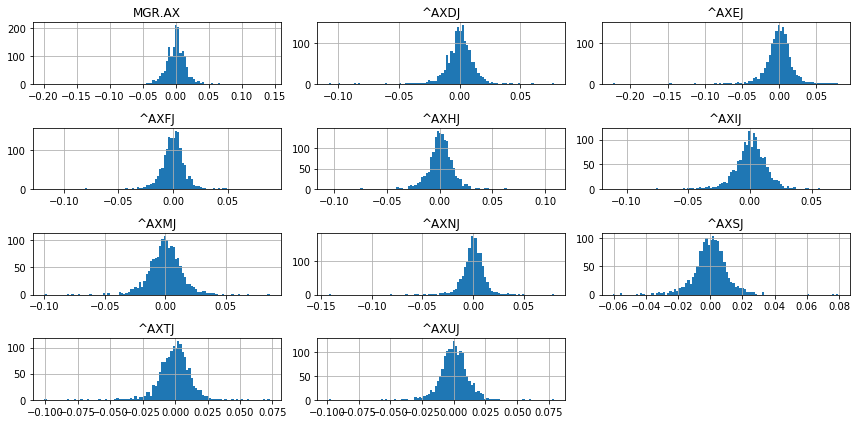

In [62]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [63]:
log_ret.mean() * 252

^AXFJ    -0.042014
^AXUJ     0.048847
^AXHJ     0.174952
^AXNJ     0.049083
MGR.AX    0.070185
^AXDJ     0.048839
^AXSJ     0.040130
^AXEJ    -0.111423
^AXTJ    -0.074174
^AXMJ     0.050607
^AXIJ     0.117088
dtype: float64

In [64]:
# Compute pairwise covariance of columns
log_ret.cov()

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
^AXFJ,0.000173,0.000072,0.000093,0.000105,0.000133,0.000118,0.000085,0.000156,0.000082,0.000111,0.000124
^AXUJ,0.000072,0.000122,0.000068,0.000071,0.000069,0.000070,0.000057,0.000078,0.000058,0.000062,0.000067
^AXHJ,0.000093,0.000068,0.000170,0.000092,0.000076,0.000102,0.000082,0.000103,0.000076,0.000078,0.000115
^AXNJ,0.000105,0.000071,0.000092,0.000123,0.000111,0.000104,0.000068,0.000124,0.000071,0.000089,0.000115
MGR.AX,0.000133,0.000069,0.000076,0.000111,0.000296,0.000115,0.000061,0.000137,0.000077,0.000084,0.000114
^AXDJ,0.000118,0.000070,0.000102,0.000104,0.000115,0.000142,0.000081,0.000139,0.000083,0.000095,0.000125
^AXSJ,0.000085,0.000057,0.000082,0.000068,0.000061,0.000081,0.000115,0.000094,0.000068,0.000078,0.000084
^AXEJ,0.000156,0.000078,0.000103,0.000124,0.000137,0.000139,0.000094,0.000345,0.000093,0.000184,0.000154
^AXTJ,0.000082,0.000058,0.000076,0.000071,0.000077,0.000083,0.000068,0.000093,0.000164,0.000067,0.000088
^AXMJ,0.000111,0.000062,0.000078,0.000089,0.000084,0.000095,0.000078,0.000184,0.000067,0.000195,0.000109


In [65]:
log_ret.cov()*252 # multiply by days

,^AXFJ,^AXUJ,^AXHJ,^AXNJ,MGR.AX,^AXDJ,^AXSJ,^AXEJ,^AXTJ,^AXMJ,^AXIJ
^AXFJ,0.043694,0.018204,0.023382,0.026539,0.033553,0.029856,0.021331,0.039289,0.020737,0.028078,0.031258
^AXUJ,0.018204,0.030674,0.017175,0.017899,0.017487,0.017627,0.014361,0.019585,0.014605,0.015532,0.016858
^AXHJ,0.023382,0.017175,0.042835,0.023100,0.019133,0.025579,0.020681,0.025915,0.019096,0.019701,0.028950
^AXNJ,0.026539,0.017899,0.023100,0.031055,0.028065,0.026319,0.017207,0.031284,0.017991,0.022445,0.028903
MGR.AX,0.033553,0.017487,0.019133,0.028065,0.074567,0.028982,0.015343,0.034412,0.019464,0.021207,0.028797
^AXDJ,0.029856,0.017627,0.025579,0.026319,0.028982,0.035910,0.020484,0.035102,0.020835,0.024020,0.031418
^AXSJ,0.021331,0.014361,0.020681,0.017207,0.015343,0.020484,0.028928,0.023573,0.017250,0.019592,0.021203
^AXEJ,0.039289,0.019585,0.025915,0.031284,0.034412,0.035102,0.023573,0.086826,0.023469,0.046425,0.038713
^AXTJ,0.020737,0.014605,0.019096,0.017991,0.019464,0.020835,0.017250,0.023469,0.041287,0.016866,0.022108
^AXMJ,0.028078,0.015532,0.019701,0.022445,0.021207,0.024020,0.019592,0.046425,0.016866,0.049135,0.027590


## Single Run for Some Random Allocation

In [72]:
# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(11))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['^AXFJ', '^AXUJ', '^AXHJ', '^AXNJ', 'MGR.AX', '^AXDJ', '^AXSJ', '^AXEJ',
       '^AXTJ', '^AXMJ', '^AXIJ'],
      dtype='object')


Creating Random Weights
[0.4613474  0.73017706 0.04218341 0.84907673 0.17401319 0.06619981
 0.06695336 0.06401087 0.69555922 0.41552984 0.904273  ]


Rebalance to sum to 1.0
[0.10322532 0.16337528 0.00943843 0.18997879 0.03893501 0.01481204
 0.01498065 0.01432227 0.15562963 0.09297376 0.20232881]


Expected Portfolio Return
0.033932747192822944


Expected Volatility
0.15857395859808268


Sharpe Ratio
0.2139868834253421


Great! Now we can just run this many times over!

In [73]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(11))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [74]:
sharpe_arr.max()

0.5343246601554503

In [75]:
sharpe_arr.argmax()

9639

In [78]:
stocks.columns

Index(['^AXFJ', '^AXUJ', '^AXHJ', '^AXNJ', 'MGR.AX', '^AXDJ', '^AXSJ', '^AXEJ',
       '^AXTJ', '^AXMJ', '^AXIJ'],
      dtype='object')

In [76]:
all_weights[9639,:]

array([0.0327869 , 0.33459762, 0.25436761, 0.0058928 , 0.01317723,
       0.04468569, 0.06666649, 0.00759675, 0.01750709, 0.11473369,
       0.10798815])

In [79]:
max_sr_ret = ret_arr[9639]
max_sr_vol = vol_arr[9639]

## Plotting the data

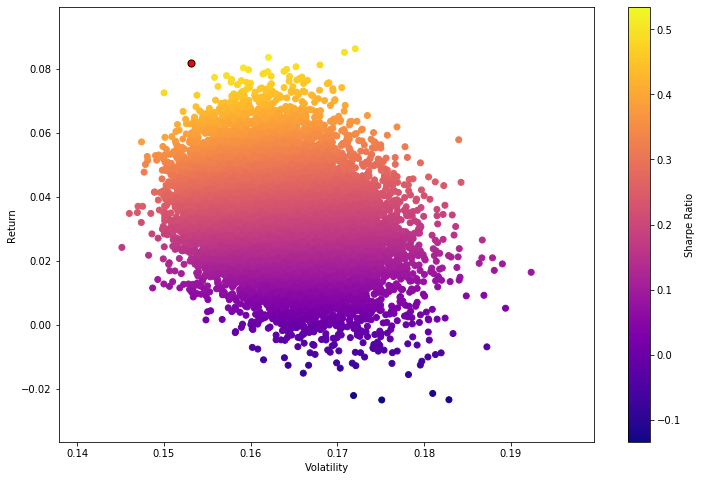

In [80]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

### Functionalize Return and SR operations

In [81]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [82]:
from scipy.optimize import minimize

In [84]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [85]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [86]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [87]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),(0, 1))

In [88]:
# Initial Guess (equal distribution)
init_guess = [0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]

In [89]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [90]:
opt_results

     fun: -0.8453159736291735
     jac: array([ 6.64424263e-01,  1.02924630e-01, -7.45058060e-09,  2.18699828e-01,
        3.84509265e-02,  2.68812545e-01,  2.14226343e-01,  1.04977795e+00,
        7.35232003e-01,  1.44269332e-01,  5.57100773e-03])
 message: 'Optimization terminated successfully.'
    nfev: 65
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.39452186e-16, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.35139802e-16,
       1.97973400e-16, 2.07129718e-18, 0.00000000e+00])

In [91]:
opt_results.x

array([3.39452186e-16, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.35139802e-16,
       1.97973400e-16, 2.07129718e-18, 0.00000000e+00])

In [92]:
get_ret_vol_sr(opt_results.x)

array([0.17495219, 0.20696662, 0.84531597])

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [93]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [94]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [95]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

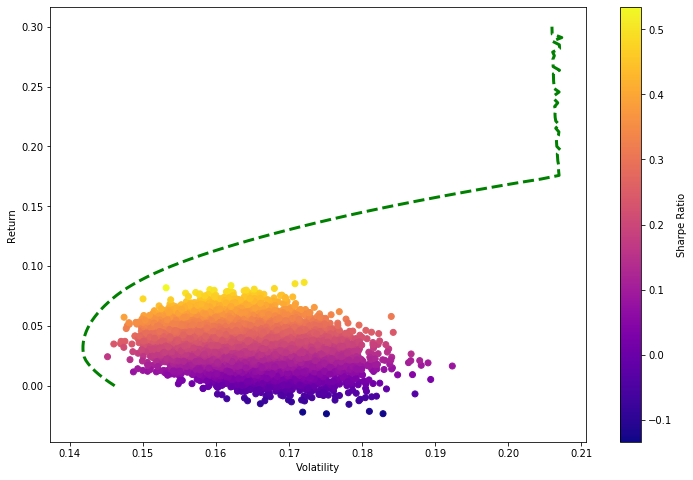

In [96]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Great Job!